## Advanced Analytics in Fundraising

### Members: HOBEIKA Rebecca     •     IONASCU Alexandra-Maria     •     LAGO Jenie Marie     •     SEO Yerim

In [1]:
import pandas as pd
import numpy as np

from matplotlib             import pyplot

In [2]:
# Goal: Build a predictive model to select the best candidates for a fundraising campaign.

In [3]:
trainingFileCsv = "selection campaign 6169.csv"
trainingCampaignId = 6169

TestingFileCsv = "selection campaign 7244.csv"
testingCampaignId = 7244

In [4]:
donors = pd.read_csv("donors.csv", sep=";")
print(len(donors))
# Contains socio demographic information on all the donors that made at least one donation via DSC.

44691


In [5]:
donors.head(5)

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,1986-12-23
3,100004,1020.0,Brussels,Brussels,F,FR,1952-03-29
4,100005,1020.0,Brussels,Brussels,F,FR,1986-06-25


In [6]:
donors["dateOfBirth"].min()

'1889-06-14'

In [7]:
campaigns = pd.read_csv("campaigns.csv", sep=";")
print(len(campaigns))

# Contains details of all the campaigns launched by DSC since 2004.

367


In [8]:
campaigns.head(5)

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [9]:
# ORIGINAL
campaigns.loc[campaigns['campaignID'].isin([trainingCampaignId,testingCampaignId])]

,campaignID,date,lettersSent,CostUnit
335,6169,04/09/2018,34 888,"0,87 €"
354,7244,18/06/2019,25 645,"0,55 €"


In [10]:
# AFTER CONVERSION
campaigns["date"] = pd.to_datetime(campaigns["date"], format='%d/%m/%Y')
campaigns.loc[campaigns['campaignID'].isin([trainingCampaignId,testingCampaignId])]

,campaignID,date,lettersSent,CostUnit
335,6169,2018-09-04,34 888,"0,87 €"
354,7244,2019-06-18,25 645,"0,55 €"


In [11]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaignID   367 non-null    int64         
 1   date         367 non-null    datetime64[ns]
 2   lettersSent  367 non-null    object        
 3   CostUnit     367 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 11.6+ KB


In [12]:
gifts = pd.read_csv("gifts.csv", sep=";")
print(len(gifts))
# Contains a complete history of all donations made over a 20 year period.

216594


In [13]:
gifts

,donorID,campaignID,amount,date
0,100001,NaN,12.39,2004-03-23
1,100001,1577.0,12.39,2007-10-11
2,100001,1634.0,6.69,2007-12-28
3,100001,1778.0,24.79,2008-06-14
4,100001,1808.0,7.44,2008-07-09
...,...,...,...,...
216589,265584,6169.0,300.00,2018-09-23
216590,281770,6169.0,30.00,2018-09-08
216591,317880,6169.0,157.50,2018-09-12
216592,480980,6169.0,36.00,2018-09-12


In [14]:
# Before any changes
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  int64  
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  float64
 3   date        216594 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 6.6+ MB


In [15]:
gifts["campaignID"] = gifts["campaignID"].fillna(0)

# Change the campaignID type from float to integer
#gifts.loc[:,"campaignID"] = gifts.loc[:,"campaignID"].astype(int)
gifts['campaignID'] = gifts['campaignID'].astype('Int64')

In [16]:
gifts["date"] = pd.to_datetime(gifts["date"], format='%Y-%m-%d')

In [17]:
# After format change
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   donorID     216594 non-null  int64         
 1   campaignID  216594 non-null  Int64         
 2   amount      216594 non-null  float64       
 3   date        216594 non-null  datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1)
memory usage: 6.8 MB


In [18]:
gifts

,donorID,campaignID,amount,date
0,100001,0,12.39,2004-03-23
1,100001,1577,12.39,2007-10-11
2,100001,1634,6.69,2007-12-28
3,100001,1778,24.79,2008-06-14
4,100001,1808,7.44,2008-07-09
...,...,...,...,...
216589,265584,6169,300.00,2018-09-23
216590,281770,6169,30.00,2018-09-08
216591,317880,6169,157.50,2018-09-12
216592,480980,6169,36.00,2018-09-12


In [19]:
# Check test campaign in gifts
gifts[gifts['campaignID'] == 7244]

,donorID,campaignID,amount,date
5828,100724,7244,40.0,2019-07-04
7527,100896,7244,10.0,2019-06-28
8314,100964,7244,100.0,2019-06-30
9269,101066,7244,60.0,2019-07-06
9316,101069,7244,80.0,2019-07-06
...,...,...,...,...
214899,144369,7244,6.0,2019-07-01
214914,144371,7244,100.0,2019-07-02
215729,144481,7244,80.0,2019-06-23
215878,144512,7244,20.0,2019-07-07


In [20]:
# Check training campaign in gifts
gifts[gifts['campaignID'] == trainingCampaignId]

,donorID,campaignID,amount,date
132,100023,6169,15.0,2018-09-15
705,100126,6169,123.0,2018-09-11
1151,100253,6169,120.0,2018-09-18
1362,100279,6169,75.0,2018-09-13
1804,100320,6169,135.0,2018-09-09
...,...,...,...,...
216589,265584,6169,300.0,2018-09-23
216590,281770,6169,30.0,2018-09-08
216591,317880,6169,157.5,2018-09-12
216592,480980,6169,36.0,2018-09-12


In [21]:
# Add column for the year date was given
gifts['Year'] = pd.DatetimeIndex(gifts['date']).year
gifts.head()

,donorID,campaignID,amount,date,Year
0,100001,0,12.39,2004-03-23,2004
1,100001,1577,12.39,2007-10-11,2007
2,100001,1634,6.69,2007-12-28,2007
3,100001,1778,24.79,2008-06-14,2008
4,100001,1808,7.44,2008-07-09,2008


In [22]:
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   donorID     216594 non-null  int64         
 1   campaignID  216594 non-null  Int64         
 2   amount      216594 non-null  float64       
 3   date        216594 non-null  datetime64[ns]
 4   Year        216594 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 8.5 MB


In [23]:
# Check if campaign is sorted by campaign id or not
campaigns[campaigns['campaignID'] <= trainingCampaignId].sort_values(by='campaignID', ascending=False).head()

,campaignID,date,lettersSent,CostUnit
335,6169,2018-09-04,34 888,"0,87 €"
334,6168,2018-08-25,26 787,"0,30 €"
333,5449,2018-08-05,30 991,"0,10 €"
332,5434,2018-07-19,26 255,"0,20 €"
331,5397,2018-07-05,6 457,"0,09 €"


In [24]:
# Use date of the campaign 
campaigns[campaigns['date'] <= '2018-09-04'].sort_values(by='date', ascending=False).head()

# VERDICT: Campaigns seem to be ordered by campaignID

,campaignID,date,lettersSent,CostUnit
335,6169,2018-09-04,34 888,"0,87 €"
334,6168,2018-08-25,26 787,"0,30 €"
333,5449,2018-08-05,30 991,"0,10 €"
332,5434,2018-07-19,26 255,"0,20 €"
331,5397,2018-07-05,6 457,"0,09 €"


In [25]:
# Check if gifts from previous campaigns are received during or after the next campaign
gifts[gifts['campaignID'] == 6168].sort_values(by='date', ascending=False).head()

# VERDICT: YES

,donorID,campaignID,amount,date,Year
157836,124329,6168,41.0,2018-09-14,2018
8726,101002,6168,10.0,2018-09-14,2018
151185,122795,6168,10.0,2018-09-14,2018
147504,122091,6168,50.0,2018-09-14,2018
185509,131710,6168,10.0,2018-09-14,2018


In [26]:
all_gifts = gifts
#gifts = gifts[gifts["date"] <= "2018-09-04"]

In [27]:
gifts_onTrainingCampaign = gifts[gifts['campaignID'] == trainingCampaignId]
print(gifts_onTrainingCampaign["donorID"].count())
gifts_onTrainingCampaign.info()

1191
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 132 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     1191 non-null   int64         
 1   campaignID  1191 non-null   Int64         
 2   amount      1191 non-null   float64       
 3   date        1191 non-null   datetime64[ns]
 4   Year        1191 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 57.0 KB


In [28]:
gifts_onTrainingCampaign.sort_values(by='date', ascending=False).head()

,donorID,campaignID,amount,date,Year
147679,122120,6169,75.0,2018-09-24,2018
165556,126206,6169,30.0,2018-09-24,2018
147790,122149,6169,120.0,2018-09-24,2018
91795,111362,6169,60.0,2018-09-24,2018
169723,127236,6169,90.0,2018-09-24,2018


In [29]:
gifts_onTrainingCampaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191 entries, 132 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     1191 non-null   int64         
 1   campaignID  1191 non-null   Int64         
 2   amount      1191 non-null   float64       
 3   date        1191 non-null   datetime64[ns]
 4   Year        1191 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 57.0 KB


In [30]:
gifts_onTestCampaign = gifts[gifts['campaignID'] == testingCampaignId]
print(gifts_onTestCampaign["donorID"].count())
gifts_onTestCampaign.info()

#gifts_testCampaign["donorID"].count()
#gifts_onCampaignDate.head()

361
<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 5828 to 215956
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     361 non-null    int64         
 1   campaignID  361 non-null    Int64         
 2   amount      361 non-null    float64       
 3   date        361 non-null    datetime64[ns]
 4   Year        361 non-null    int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 17.3 KB


In [31]:
gifts_onTestCampaign.head()

,donorID,campaignID,amount,date,Year
5828,100724,7244,40.0,2019-07-04,2019
7527,100896,7244,10.0,2019-06-28,2019
8314,100964,7244,100.0,2019-06-30,2019
9269,101066,7244,60.0,2019-07-06,2019
9316,101069,7244,80.0,2019-07-06,2019


In [32]:
gifts_onTestCampaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 5828 to 215956
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     361 non-null    int64         
 1   campaignID  361 non-null    Int64         
 2   amount      361 non-null    float64       
 3   date        361 non-null    datetime64[ns]
 4   Year        361 non-null    int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 17.3 KB


In [33]:
# Use date limit. Use one year for now
gifts_before_trainingcampaign = gifts.loc[(gifts['date'] < '2018-08-04') & (gifts['date'] > '2017-08-04')]
gifts_before_trainingcampaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304 entries, 14 to 216575
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     3304 non-null   int64         
 1   campaignID  3304 non-null   Int64         
 2   amount      3304 non-null   float64       
 3   date        3304 non-null   datetime64[ns]
 4   Year        3304 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 158.1 KB


In [34]:
gifts_before_trainingcampaign.sort_values(by='date', ascending=False).head()

,donorID,campaignID,amount,date,Year
20594,102345,5434,41.0,2018-08-03,2018
17886,101984,5434,40.0,2018-08-03,2018
211059,142064,5434,40.0,2018-08-03,2018
92394,111468,5434,40.0,2018-08-02,2018
38912,104283,5434,41.0,2018-08-02,2018


In [35]:
gifts_before_trainingcampaign.sort_values(by='date', ascending=False).tail()

,donorID,campaignID,amount,date,Year
210837,141957,4828,30.00,2017-08-08,2017
201426,136794,0,12.00,2017-08-06,2017
193897,134279,4828,1.43,2017-08-05,2017
66201,107730,4828,5.00,2017-08-05,2017
211450,142177,4828,3.25,2017-08-05,2017


In [36]:
gifts_num_donations = gifts_before_trainingcampaign.groupby('donorID', as_index=False)['campaignID'].count()
gifts_num_donations_df = pd.DataFrame(gifts_num_donations)
gifts_num_donations_df.columns = ["donorID", "Num_Donations_Past_Year"]
gifts_num_donations_df

,donorID,Num_Donations_Past_Year
0,100003,4
1,100005,1
2,100006,1
3,100007,1
4,100030,1
...,...,...
2502,144626,1
2503,144657,4
2504,144671,2
2505,144676,1


In [37]:
campaign_6169 = pd.read_csv(trainingFileCsv, sep=";")
print(len(campaign_6169))

34888


In [38]:
campaign_6169

,donorID
0,100001
1,100002
2,100004
3,100008
4,100009
...,...
34883,144686
34884,144687
34885,144689
34886,144690


In [39]:
campaign_6169 = campaign_6169.merge(gifts_num_donations_df, on='donorID', how='left')
campaign_6169

,donorID,Num_Donations_Past_Year
0,100001,NaN
1,100002,NaN
2,100004,NaN
3,100008,NaN
4,100009,NaN
...,...,...
34883,144686,NaN
34884,144687,NaN
34885,144689,1.0
34886,144690,NaN


In [40]:
gifts_total_amount = gifts_before_trainingcampaign.groupby('donorID', as_index=False)['amount'].sum()
gifts_total_amount_df = pd.DataFrame(gifts_total_amount)
gifts_total_amount_df.columns = ["donorID", "Total_Amount_Donated_Past_Year"]
gifts_total_amount_df
campaign_6169 = campaign_6169.merge(gifts_total_amount_df, on='donorID', how='left')

In [41]:
campaign_6169

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year
0,100001,NaN,NaN
1,100002,NaN,NaN
2,100004,NaN,NaN
3,100008,NaN,NaN
4,100009,NaN,NaN
...,...,...,...
34883,144686,NaN,NaN
34884,144687,NaN,NaN
34885,144689,1.0,100.0
34886,144690,NaN,NaN


In [42]:
# Retain the use of gifts table so we see even super old donations 
# But make sure last one is not beyond the campaign date

gifts_before_campaign_all = gifts.loc[gifts['date'] < '2018-08-04']
gifts_last_donation = gifts_before_campaign_all.groupby('donorID', as_index=False)['date'].max()
gifts_last_donation_df = pd.DataFrame(gifts_last_donation)
gifts_last_donation_df.columns = ["donorID", "Date_of_last_donation_longterm"]
gifts_last_donation_df
campaign_6169 = campaign_6169.merge(gifts_last_donation_df, on='donorID', how='left')
campaign_6169

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm
0,100001,NaN,NaN,2011-12-30
1,100002,NaN,NaN,2015-01-10
2,100004,NaN,NaN,2011-06-03
3,100008,NaN,NaN,2011-10-28
4,100009,NaN,NaN,2012-03-25
...,...,...,...,...
34883,144686,NaN,NaN,2015-04-28
34884,144687,NaN,NaN,2015-11-06
34885,144689,1.0,100.0,2018-06-25
34886,144690,NaN,NaN,2014-12-30


In [43]:
avg_donation_per_year = gifts_before_campaign_all.groupby(['donorID'], as_index=False)['amount'].mean()
avg_donation_per_year_df = pd.DataFrame(avg_donation_per_year)
avg_donation_per_year_df.columns = ["donorID","Average_donation_longterm"]
avg_donation_per_year_df

,donorID,Average_donation_longterm
0,100001,14.874167
1,100002,20.000000
2,100003,3.600000
3,100004,27.546923
4,100005,3.740000
...,...,...
44681,144687,10.000000
44682,144688,6.937143
44683,144689,62.395000
44684,144690,40.000000


In [44]:
campaign_6169 = campaign_6169.merge(avg_donation_per_year_df, on='donorID', how='left')
campaign_6169

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm
0,100001,NaN,NaN,2011-12-30,14.874167
1,100002,NaN,NaN,2015-01-10,20.000000
2,100004,NaN,NaN,2011-06-03,27.546923
3,100008,NaN,NaN,2011-10-28,41.456667
4,100009,NaN,NaN,2012-03-25,17.198947
...,...,...,...,...,...
34883,144686,NaN,NaN,2015-04-28,50.000000
34884,144687,NaN,NaN,2015-11-06,10.000000
34885,144689,1.0,100.0,2018-06-25,62.395000
34886,144690,NaN,NaN,2014-12-30,40.000000


In [45]:
train = campaign_6169.merge(donors, on='donorID', how='left')
train

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth
0,100001,NaN,NaN,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,NaN,NaN,2015-01-10,20.000000,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100004,NaN,NaN,2011-06-03,27.546923,1020.0,Brussels,Brussels,F,FR,1952-03-29
3,100008,NaN,NaN,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30
4,100009,NaN,NaN,2012-03-25,17.198947,1020.0,Brussels,Brussels,M,FR,1932-01-20
...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,NaN,NaN,2015-04-28,50.000000,2440.0,Antwerp,Flanders,F,NL,1964-09-28
34884,144687,NaN,NaN,2015-11-06,10.000000,4900.0,Liege,Wallonia,M,FR,1970-09-12
34885,144689,1.0,100.0,2018-06-25,62.395000,3061.0,Flemish Brabant,Flanders,M,NL,1967-04-21
34886,144690,NaN,NaN,2014-12-30,40.000000,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07


In [46]:
def is_dsc(row):
    if pd.isnull(row['region']):
        val = 0
    else:
        val = 1
    return val

In [47]:
train["dsc_donation"] = train.apply(is_dsc, axis=1)

In [48]:
# only people who donated through dsc
dsc_donors = train[train["region"].isna() == False]

In [49]:
dsc_donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34874 entries, 0 to 34887
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   donorID                         34874 non-null  int64         
 1   Num_Donations_Past_Year         267 non-null    float64       
 2   Total_Amount_Donated_Past_Year  267 non-null    float64       
 3   Date_of_last_donation_longterm  34869 non-null  datetime64[ns]
 4   Average_donation_longterm       34869 non-null  float64       
 5   zipcode                         34872 non-null  float64       
 6   province                        34874 non-null  object        
 7   region                          34874 non-null  object        
 8   gender                          34854 non-null  object        
 9   language                        34874 non-null  object        
 10  dateOfBirth                     34874 non-null  object        
 11  ds

In [50]:
# Calculate age during campaign
from datetime import date, timedelta
dsc_donors["dateOfBirth"] = pd.to_datetime(dsc_donors["dateOfBirth"], format='%Y-%m-%d')
dsc_donors['age'] = (pd.to_datetime('2018-09-04', format='%Y-%m-%d') - dsc_donors["dateOfBirth"]) // timedelta(days=365.2425)

<ipython-input-50-18790739809d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors["dateOfBirth"] = pd.to_datetime(dsc_donors["dateOfBirth"], format='%Y-%m-%d')
<ipython-input-50-18790739809d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors['age'] = (pd.to_datetime('2018-09-04', format='%Y-%m-%d') - dsc_donors["dateOfBirth"]) // timedelta(days=365.2425)


In [51]:
dsc_donors.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,NaN,NaN,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,50
1,100002,NaN,NaN,2015-01-10,20.000000,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,66
2,100004,NaN,NaN,2011-06-03,27.546923,1020.0,Brussels,Brussels,F,FR,1952-03-29,1,66
3,100008,NaN,NaN,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
4,100009,NaN,NaN,2012-03-25,17.198947,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,86


In [52]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   campaignID   367 non-null    int64         
 1   date         367 non-null    datetime64[ns]
 2   lettersSent  367 non-null    object        
 3   CostUnit     367 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 11.6+ KB


In [53]:
dsc_donors.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,NaN,NaN,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,50
1,100002,NaN,NaN,2015-01-10,20.000000,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,66
2,100004,NaN,NaN,2011-06-03,27.546923,1020.0,Brussels,Brussels,F,FR,1952-03-29,1,66
3,100008,NaN,NaN,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
4,100009,NaN,NaN,2012-03-25,17.198947,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,86


In [54]:
dsc_donors["gender"].value_counts()

M    20654
F    14200
Name: gender, dtype: int64

In [55]:
# # donors of the dsc campaign that made donations before and during the campaign on 04/09/2018.

# """"""dsc_donors = dsc_donors.fillna(0)
# no_donation = len(dsc_donors[dsc_donors["No Donations"] ==0])
# with_donation = len(dsc_donors[dsc_donors["No Donations"] >=1])
# print("People with no donation", no_donation)
# print("People with more than one donation", with_donation)
# percent_of_donation_out_of_total = with_donation*100/len(dsc_donors)
# print("Percent out of total",percent_of_donation_out_of_total )"""

In [56]:
dsc_donors

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,NaN,NaN,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,50
1,100002,NaN,NaN,2015-01-10,20.000000,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,66
2,100004,NaN,NaN,2011-06-03,27.546923,1020.0,Brussels,Brussels,F,FR,1952-03-29,1,66
3,100008,NaN,NaN,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
4,100009,NaN,NaN,2012-03-25,17.198947,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,NaN,NaN,2015-04-28,50.000000,2440.0,Antwerp,Flanders,F,NL,1964-09-28,1,53
34884,144687,NaN,NaN,2015-11-06,10.000000,4900.0,Liege,Wallonia,M,FR,1970-09-12,1,47
34885,144689,1.0,100.0,2018-06-25,62.395000,3061.0,Flemish Brabant,Flanders,M,NL,1967-04-21,1,51
34886,144690,NaN,NaN,2014-12-30,40.000000,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07,1,42


In [57]:
dsc_donors[['Num_Donations_Past_Year','Total_Amount_Donated_Past_Year']] = dsc_donors[['Num_Donations_Past_Year','Total_Amount_Donated_Past_Year']].fillna(0)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [58]:
dsc_donors

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,0.0,0.0,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,50
1,100002,0.0,0.0,2015-01-10,20.000000,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,66
2,100004,0.0,0.0,2011-06-03,27.546923,1020.0,Brussels,Brussels,F,FR,1952-03-29,1,66
3,100008,0.0,0.0,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
4,100009,0.0,0.0,2012-03-25,17.198947,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,0.0,0.0,2015-04-28,50.000000,2440.0,Antwerp,Flanders,F,NL,1964-09-28,1,53
34884,144687,0.0,0.0,2015-11-06,10.000000,4900.0,Liege,Wallonia,M,FR,1970-09-12,1,47
34885,144689,1.0,100.0,2018-06-25,62.395000,3061.0,Flemish Brabant,Flanders,M,NL,1967-04-21,1,51
34886,144690,0.0,0.0,2014-12-30,40.000000,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07,1,42


In [59]:
dsc_donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34874 entries, 0 to 34887
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   donorID                         34874 non-null  int64         
 1   Num_Donations_Past_Year         34874 non-null  float64       
 2   Total_Amount_Donated_Past_Year  34874 non-null  float64       
 3   Date_of_last_donation_longterm  34869 non-null  datetime64[ns]
 4   Average_donation_longterm       34869 non-null  float64       
 5   zipcode                         34872 non-null  float64       
 6   province                        34874 non-null  object        
 7   region                          34874 non-null  object        
 8   gender                          34854 non-null  object        
 9   language                        34874 non-null  object        
 10  dateOfBirth                     34874 non-null  datetime64[ns]
 11  ds

In [60]:
#month of campaign
#dsc_donors.dtypes
#dsc_donors['Date of last donation_2'] =  pd.to_datetime(dsc_donors['Date of last donation'], format='%Y-%m-%d %H:%M:%S')
#pd.to_datetime(dsc_donors['Date of last donation'].astype(str), format='%Y-%m-%d')
#dsc_donors['Date_of_last_donation'] = pd.to_datetime(dsc_donors['Date_of_last_donation'], infer_datetime_format=True)
# dsc_donors["Date of last donation"] = pd.to_datetime(campaigns["date"])
#dsc_donors['month_last_donation'] = dsc_donors['Date_of_last_donation'].month

# Use this in the analysis but not in prediction

In [61]:
dsc_donors

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,0.0,0.0,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,50
1,100002,0.0,0.0,2015-01-10,20.000000,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,66
2,100004,0.0,0.0,2011-06-03,27.546923,1020.0,Brussels,Brussels,F,FR,1952-03-29,1,66
3,100008,0.0,0.0,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
4,100009,0.0,0.0,2012-03-25,17.198947,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,0.0,0.0,2015-04-28,50.000000,2440.0,Antwerp,Flanders,F,NL,1964-09-28,1,53
34884,144687,0.0,0.0,2015-11-06,10.000000,4900.0,Liege,Wallonia,M,FR,1970-09-12,1,47
34885,144689,1.0,100.0,2018-06-25,62.395000,3061.0,Flemish Brabant,Flanders,M,NL,1967-04-21,1,51
34886,144690,0.0,0.0,2014-12-30,40.000000,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07,1,42


In [62]:
# Use in analysis
# #minimum amount donated
# dsc_donors['Minimum_donation_amount'] = dsc_donors[dsc_donors.iloc[:, 4:22].astype(float) > .01].min(axis=1)
# #need to get rid of zeros for the minimum

# #maximum amount donated
# dsc_donors['Maximum_donation_amount'] = dsc_donors.iloc[:, 4:22].astype(float).max(axis=1)

In [63]:
print(dsc_donors['gender'].unique())
print(dsc_donors['language'].unique())

['F' 'M' nan]
['NL' 'FR' 'EN']


In [64]:
# we have 20 zeros in gender column
sum(dsc_donors['gender']==0) 

0

In [65]:
# Female:1
# Male: 2
dsc_donors.loc[dsc_donors['gender'] == 'F', 'gender'] = 1
dsc_donors.loc[dsc_donors['gender'] == 'M', 'gender'] = 2

dsc_donors.loc[dsc_donors['language'] == 'NL', 'language'] = 1
dsc_donors.loc[dsc_donors['language'] == 'FR', 'language'] = 2
dsc_donors.loc[dsc_donors['language'] == 'EN', 'language'] = 3

dsc_donors.head()

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,0.0,0.0,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,50
1,100002,0.0,0.0,2015-01-10,20.000000,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,66
2,100004,0.0,0.0,2011-06-03,27.546923,1020.0,Brussels,Brussels,1,2,1952-03-29,1,66
3,100008,0.0,0.0,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81
4,100009,0.0,0.0,2012-03-25,17.198947,1020.0,Brussels,Brussels,2,2,1932-01-20,1,86


In [66]:
def is_dsc(row):
    if pd.isnull(row['region']):
        val = 0
    else:
        val = 1
    return val
train["dsc_donation"] = train.apply(is_dsc, axis=1)

In [67]:
sum(dsc_donors['gender']==1)

14200

In [68]:
campaign_6169_date = pd.to_datetime('2018-08-04')
campaign_6169_date

Timestamp('2018-08-04 00:00:00')

In [69]:
# Get recency
dsc_donors['Recency'] = (campaign_6169_date - dsc_donors['Date_of_last_donation_longterm']) // timedelta(days=1)

<ipython-input-69-dbcd28cd86cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors['Recency'] = (campaign_6169_date - dsc_donors['Date_of_last_donation_longterm']) // timedelta(days=1)


In [70]:
dsc_donors

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age,Recency
0,100001,0.0,0.0,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,50,2409.0
1,100002,0.0,0.0,2015-01-10,20.000000,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,66,1302.0
2,100004,0.0,0.0,2011-06-03,27.546923,1020.0,Brussels,Brussels,1,2,1952-03-29,1,66,2619.0
3,100008,0.0,0.0,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81,2472.0
4,100009,0.0,0.0,2012-03-25,17.198947,1020.0,Brussels,Brussels,2,2,1932-01-20,1,86,2323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,144686,0.0,0.0,2015-04-28,50.000000,2440.0,Antwerp,Flanders,1,1,1964-09-28,1,53,1194.0
34884,144687,0.0,0.0,2015-11-06,10.000000,4900.0,Liege,Wallonia,2,2,1970-09-12,1,47,1002.0
34885,144689,1.0,100.0,2018-06-25,62.395000,3061.0,Flemish Brabant,Flanders,2,1,1967-04-21,1,51,40.0
34886,144690,0.0,0.0,2014-12-30,40.000000,1950.0,Flemish Brabant,Flanders,2,2,1976-05-07,1,42,1313.0


In [71]:
dsc_donors_final = dsc_donors.merge(gifts_onTrainingCampaign, how="left", on="donorID")


In [72]:
dsc_donors_final['province'].value_counts()

Antwerp            8341
East Flanders      7326
West Flanders      7090
Flemish Brabant    5364
Limburg            3886
Brussels           1055
Liege               568
Hainaut             554
Walloon Brabant     278
Namur               229
Luxembourg          181
Missing               2
Name: province, dtype: int64

In [73]:
dsc_donors_final = dsc_donors_final.drop(columns=['amount', 'date', 'Year'])
dsc_donors_final['campaignID'] = dsc_donors_final['campaignID'].fillna(0)


In [74]:
dsc_donors_final['province'].value_counts()

Antwerp            8341
East Flanders      7326
West Flanders      7090
Flemish Brabant    5364
Limburg            3886
Brussels           1055
Liege               568
Hainaut             554
Walloon Brabant     278
Namur               229
Luxembourg          181
Missing               2
Name: province, dtype: int64

In [75]:
dsc_donors_final['campaignID'] = dsc_donors_final['campaignID'].replace(6169, 1)
dsc_donors_final['campaignID'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [76]:
dsc_donors_final = dsc_donors_final.rename(columns={'campaignID':'Target'})
dsc_donors_final

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age,Recency,Target
0,100001,0.0,0.0,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,50,2409.0,0
1,100002,0.0,0.0,2015-01-10,20.000000,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,66,1302.0,0
2,100004,0.0,0.0,2011-06-03,27.546923,1020.0,Brussels,Brussels,1,2,1952-03-29,1,66,2619.0,0
3,100008,0.0,0.0,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81,2472.0,0
4,100009,0.0,0.0,2012-03-25,17.198947,1020.0,Brussels,Brussels,2,2,1932-01-20,1,86,2323.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,0.0,0.0,2015-04-28,50.000000,2440.0,Antwerp,Flanders,1,1,1964-09-28,1,53,1194.0,0
34870,144687,0.0,0.0,2015-11-06,10.000000,4900.0,Liege,Wallonia,2,2,1970-09-12,1,47,1002.0,0
34871,144689,1.0,100.0,2018-06-25,62.395000,3061.0,Flemish Brabant,Flanders,2,1,1967-04-21,1,51,40.0,0
34872,144690,0.0,0.0,2014-12-30,40.000000,1950.0,Flemish Brabant,Flanders,2,2,1976-05-07,1,42,1313.0,0


In [77]:
dsc_donors_final = dsc_donors_final.drop(columns=['Date_of_last_donation_longterm','dateOfBirth','dsc_donation'])
dsc_donors_final

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,province,region,gender,language,age,Recency,Target
0,100001,0.0,0.0,14.874167,1861.0,Flemish Brabant,Flanders,1,1,50,2409.0,0
1,100002,0.0,0.0,20.000000,2260.0,Antwerp,Flanders,2,1,66,1302.0,0
2,100004,0.0,0.0,27.546923,1020.0,Brussels,Brussels,1,2,66,2619.0,0
3,100008,0.0,0.0,41.456667,1780.0,Flemish Brabant,Flanders,2,2,81,2472.0,0
4,100009,0.0,0.0,17.198947,1020.0,Brussels,Brussels,2,2,86,2323.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,0.0,0.0,50.000000,2440.0,Antwerp,Flanders,1,1,53,1194.0,0
34870,144687,0.0,0.0,10.000000,4900.0,Liege,Wallonia,2,2,47,1002.0,0
34871,144689,1.0,100.0,62.395000,3061.0,Flemish Brabant,Flanders,2,1,51,40.0,0
34872,144690,0.0,0.0,40.000000,1950.0,Flemish Brabant,Flanders,2,2,42,1313.0,0


In [78]:
# add here gender preprocessing, language
# Female:1
# Male: 2
dsc_donors_final.loc[dsc_donors_final['gender'] == 'F', 'gender'] = 1
dsc_donors_final.loc[dsc_donors_final['gender'] == 'M', 'gender'] = 2

dsc_donors_final.loc[dsc_donors_final['language'] == 'NL', 'language'] = 1
dsc_donors_final.loc[dsc_donors_final['language'] == 'FR', 'language'] = 2
dsc_donors_final.loc[dsc_donors_final['language'] == 'EN', 'language'] = 3

dsc_donors_final.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,province,region,gender,language,age,Recency,Target
0,100001,0.0,0.0,14.874167,1861.0,Flemish Brabant,Flanders,1,1,50,2409.0,0
1,100002,0.0,0.0,20.000000,2260.0,Antwerp,Flanders,2,1,66,1302.0,0
2,100004,0.0,0.0,27.546923,1020.0,Brussels,Brussels,1,2,66,2619.0,0
3,100008,0.0,0.0,41.456667,1780.0,Flemish Brabant,Flanders,2,2,81,2472.0,0
4,100009,0.0,0.0,17.198947,1020.0,Brussels,Brussels,2,2,86,2323.0,0


In [79]:
dsc_donors_final['province'].value_counts()

Antwerp            8341
East Flanders      7326
West Flanders      7090
Flemish Brabant    5364
Limburg            3886
Brussels           1055
Liege               568
Hainaut             554
Walloon Brabant     278
Namur               229
Luxembourg          181
Missing               2
Name: province, dtype: int64

In [80]:
# one hot - province	region
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
transfomred = enc.fit_transform(dsc_donors_final[['province', 'region']])
df = pd.DataFrame(transfomred.toarray(), )
df.columns = enc.get_feature_names()
df

,x0_Antwerp,x0_Brussels,x0_East Flanders,x0_Flemish Brabant,x0_Hainaut,x0_Liege,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34870,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34871,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34872,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
dsc_donors_final_enc = dsc_donors_final.join(df)


In [82]:
dsc_donors_final_enc = dsc_donors_final_enc.drop(columns =['province', 'region'])
dsc_donors_final_enc

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,Target,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,100001,0.0,0.0,14.874167,1861.0,1,1,50,2409.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100002,0.0,0.0,20.000000,2260.0,2,1,66,1302.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100004,0.0,0.0,27.546923,1020.0,1,2,66,2619.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100008,0.0,0.0,41.456667,1780.0,2,2,81,2472.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,100009,0.0,0.0,17.198947,1020.0,2,2,86,2323.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,0.0,0.0,50.000000,2440.0,1,1,53,1194.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34870,144687,0.0,0.0,10.000000,4900.0,2,2,47,1002.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34871,144689,1.0,100.0,62.395000,3061.0,2,1,51,40.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34872,144690,0.0,0.0,40.000000,1950.0,2,2,42,1313.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
enc.categories_

[array(['Antwerp', 'Brussels', 'East Flanders', 'Flemish Brabant',
        'Hainaut', 'Liege', 'Limburg', 'Luxembourg', 'Missing', 'Namur',
        'Walloon Brabant', 'West Flanders'], dtype=object),
 array(['Brussels', 'Flanders', 'Missing', 'Wallonia'], dtype=object)]

In [84]:
gender_mode = dsc_donors_final_enc['gender'].mode()[0]
dsc_donors_final_enc['gender'] = dsc_donors_final_enc['gender'].fillna(gender_mode)

In [85]:
gender_mode = dsc_donors_final_enc['gender'].mode()[0]
dsc_donors_final_enc['gender'] = dsc_donors_final_enc['gender'].fillna(gender_mode)

In [86]:
zipcode_mode = dsc_donors_final_enc['zipcode'].mode()[0]
dsc_donors_final_enc['zipcode'] = dsc_donors_final_enc['zipcode'].fillna(zipcode_mode)

In [87]:

dsc_donors_final_enc = dsc_donors_final_enc[dsc_donors_final_enc['age'] <= 100]
dsc_donors_final_enc

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,Target,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,100001,0.0,0.0,14.874167,1861.0,1,1,50,2409.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100002,0.0,0.0,20.000000,2260.0,2,1,66,1302.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100004,0.0,0.0,27.546923,1020.0,1,2,66,2619.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,100008,0.0,0.0,41.456667,1780.0,2,2,81,2472.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,100009,0.0,0.0,17.198947,1020.0,2,2,86,2323.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34869,144686,0.0,0.0,50.000000,2440.0,1,1,53,1194.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34870,144687,0.0,0.0,10.000000,4900.0,2,2,47,1002.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34871,144689,1.0,100.0,62.395000,3061.0,2,1,51,40.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
34872,144690,0.0,0.0,40.000000,1950.0,2,2,42,1313.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
dsc_donors_final_enc['Average_donation_longterm'] = dsc_donors_final_enc['Average_donation_longterm'].fillna(0)
dsc_donors_final_enc['Recency'] = dsc_donors_final_enc['Recency'].fillna(0)


<ipython-input-88-c6f982f0cc0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors_final_enc['Average_donation_longterm'] = dsc_donors_final_enc['Average_donation_longterm'].fillna(0)
<ipython-input-88-c6f982f0cc0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsc_donors_final_enc['Recency'] = dsc_donors_final_enc['Recency'].fillna(0)


In [89]:
dsc_donors_final_enc.isna().sum()

donorID                           0
Num_Donations_Past_Year           0
Total_Amount_Donated_Past_Year    0
Average_donation_longterm         0
zipcode                           0
gender                            0
language                          0
age                               0
Recency                           0
Target                            0
x0_Antwerp                        0
x0_Brussels                       0
x0_East Flanders                  0
x0_Flemish Brabant                0
x0_Hainaut                        0
x0_Liege                          0
x0_Limburg                        0
x0_Luxembourg                     0
x0_Missing                        0
x0_Namur                          0
x0_Walloon Brabant                0
x0_West Flanders                  0
x1_Brussels                       0
x1_Flanders                       0
x1_Missing                        0
x1_Wallonia                       0
dtype: int64

## Split data



In [235]:
# get features and label
train_features = dsc_donors_final_enc.drop(columns=['Target', 'donorID'])
train_label = dsc_donors_final_enc['Target']

In [236]:
dsc_donors_final_enc['Target'].value_counts()

0    33696
1     1177
Name: Target, dtype: Int64

In [237]:
from sklearn.model_selection import train_test_split
# X_train = train features
# X_test = test/validation features
# y_train = train labels
# y_test = test/validation labels

X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=42)

In [238]:
y_train.value_counts()

0    26982
1      916
Name: Target, dtype: Int64

In [239]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27898 entries, 25736 to 15795
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Num_Donations_Past_Year         27898 non-null  float64
 1   Total_Amount_Donated_Past_Year  27898 non-null  float64
 2   Average_donation_longterm       27898 non-null  float64
 3   zipcode                         27898 non-null  float64
 4   gender                          27898 non-null  int64  
 5   language                        27898 non-null  object 
 6   age                             27898 non-null  int64  
 7   Recency                         27898 non-null  float64
 8   x0_Antwerp                      27898 non-null  float64
 9   x0_Brussels                     27898 non-null  float64
 10  x0_East Flanders                27898 non-null  float64
 11  x0_Flemish Brabant              27898 non-null  float64
 12  x0_Hainaut                  

In [240]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6975 entries, 14918 to 33262
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Num_Donations_Past_Year         6975 non-null   float64
 1   Total_Amount_Donated_Past_Year  6975 non-null   float64
 2   Average_donation_longterm       6975 non-null   float64
 3   zipcode                         6975 non-null   float64
 4   gender                          6975 non-null   int64  
 5   language                        6975 non-null   object 
 6   age                             6975 non-null   int64  
 7   Recency                         6975 non-null   float64
 8   x0_Antwerp                      6975 non-null   float64
 9   x0_Brussels                     6975 non-null   float64
 10  x0_East Flanders                6975 non-null   float64
 11  x0_Flemish Brabant              6975 non-null   float64
 12  x0_Hainaut                   

In [241]:
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier

tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 70000)
randomForest = RandomForestClassifier(n_estimators = 150)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [242]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

In [243]:
y_train = y_train.astype('int')

In [244]:
np.array(y_train)

array([0, 0, 0, ..., 0, 0, 0])

DecisionTreeClassifier()
tree has been trained successfully
[7.21358068e-03 1.01825613e-02 4.87255241e-01 1.26807895e-01
 9.48438618e-03 3.43631281e-03 1.23109216e-01 1.85740287e-01
 6.98795291e-03 5.64382401e-04 5.88754971e-03 4.76816778e-03
 1.75858284e-04 1.98480868e-03 8.07253924e-03 4.50631799e-03
 1.06920388e-03 2.10900792e-04 1.11737957e-03 8.14196208e-03
 2.37510927e-03 0.00000000e+00 0.00000000e+00 9.08386912e-04]


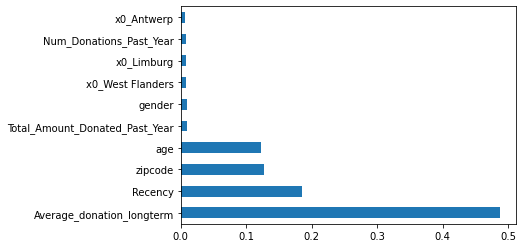

LogisticRegression(max_iter=70000)
logistic has been trained successfully
feature_importances_ not an attribute
RandomForestClassifier(n_estimators=150)
randomForest has been trained successfully
[6.19194204e-03 1.08262502e-02 3.26015812e-01 1.81216144e-01
 2.04944444e-02 4.37307574e-03 1.77756788e-01 2.42907899e-01
 5.05401482e-03 6.13007195e-04 3.83024435e-03 4.72048879e-03
 7.07792809e-04 9.50244512e-04 4.17891153e-03 6.92584960e-04
 2.31786571e-04 8.24740626e-04 4.12811029e-04 5.07340464e-03
 6.16674361e-04 1.18598658e-03 2.46147267e-04 8.78804102e-04]


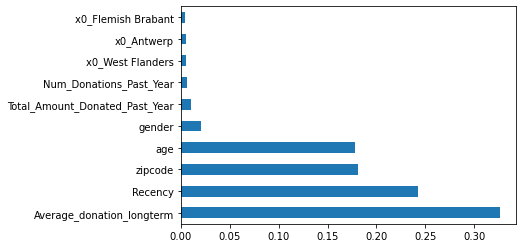

GradientBoostingClassifier()
boostedTree has been trained successfully
[1.14537373e-02 3.25854994e-02 7.79247338e-01 9.18609895e-03
 4.39594862e-02 0.00000000e+00 5.83398753e-02 5.58258053e-02
 3.80071601e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.94549834e-03 6.73173988e-05 1.92991795e-03
 1.91259121e-04 0.00000000e+00 0.00000000e+00 1.65186935e-03
 0.00000000e+00 1.50105306e-03 1.73517228e-03 0.00000000e+00]


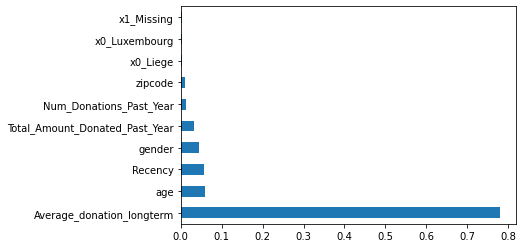

SVC(probability=True)
svm has been trained successfully
feature_importances_ not an attribute
MLPClassifier()
neuralNet has been trained successfully
feature_importances_ not an attribute
KNeighborsClassifier()
neighbors has been trained successfully
feature_importances_ not an attribute


In [245]:
import matplotlib.pyplot as plt

for model in models:
    print(models[model])
    models[model].fit(X_train,np.array(y_train))
    print(f"{model} has been trained successfully")
    try:
        print(models[model].feature_importances_)
        feat_importances = pd.Series(models[model].feature_importances_, index=X_train.columns)
        feat_importances.nlargest(10).plot(kind='barh')
        plt.show()
    except AttributeError:
        print("feature_importances_ not an attribute")

In [246]:
y_test = np.array(y_test).astype('int')

In [247]:
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score

performances = {}

for model in models:
    predictions   = models[model].predict(X_test)
    probabilities = pd.DataFrame(models[model].predict_proba(X_test))[1]

    accuracy      = accuracy_score(y_test,predictions)
    auc           = roc_auc_score(y_test,np.array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

In [248]:
pd.DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
Accuracy,0.955269,0.962581,0.963297,0.970896,0.962581,0.961147,0.962007
AUC,0.674802,0.702456,0.839168,0.900648,0.459566,0.604351,0.516384


In [102]:
# predictions   = boostedTree.predict(X_test)
# probabilities = pd.DataFrame(boostedTree.predict_proba(X_test))

# accuracy      = accuracy_score(y_test,predictions)
# auc           = roc_auc_score(y_test,np.array(pd.DataFrame(boostedTree.predict_proba(X_test))[1]))

# print("Accuracy",accuracy,"AUC",auc)

In [103]:
# X_test = X_test.reset_index()
# X_test['prediction'] = predictions
# X_test['probabilities_0'] = probabilities[0]
# X_test['probabilities_1'] = probabilities[1]

In [104]:
# X_test

In [258]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6975 entries, 14918 to 33262
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Num_Donations_Past_Year         6975 non-null   float64
 1   Total_Amount_Donated_Past_Year  6975 non-null   float64
 2   Average_donation_longterm       6975 non-null   float64
 3   zipcode                         6975 non-null   float64
 4   gender                          6975 non-null   int64  
 5   language                        6975 non-null   object 
 6   age                             6975 non-null   int64  
 7   Recency                         6975 non-null   float64
 8   x0_Antwerp                      6975 non-null   float64
 9   x0_Brussels                     6975 non-null   float64
 10  x0_East Flanders                6975 non-null   float64
 11  x0_Flemish Brabant              6975 non-null   float64
 12  x0_Hainaut                   

In [249]:
from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

In [275]:
data2      = pd.DataFrame(y_test).copy() 
for col in data2.columns: 
    data2 = data2.rename(columns={col: "a"})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6975 entries, 0 to 6974
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6975 non-null   int32
dtypes: int32(1)
memory usage: 27.4 KB


,a
0,0
1,0
2,0
3,0
4,0
...,...
6970,0
6971,0
6972,0
6973,0


In [278]:
lifts     = {}
responses = {}
gains     = {}
data      = pd.DataFrame(y_test).copy() 
#data.rename(columns={"0": "target"})
#data2      = pd.DataFrame(y_test).copy() 
for col in data.columns: 
    data = data.rename(columns={col: "target"})
        
for (index,model) in enumerate(models):
    data[f"proba {model}"] = pd.DataFrame(models[model].predict_proba(X_test))[1]
    lifts[model] = lift(dataSet = data, actuals = "target", probability = "proba "+str(model))
    responses[model] = cumulativeResponse(dataSet = data, actuals = "target", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "target", probability = "proba "+str(model))

C:\Users\jlago\Documents\Documents\Courses\Descriptive and Prescriptive Analytics\Group Project\Solution\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
C:\Users\jlago\Documents\Documents\Courses\Descriptive and Prescriptive Analytics\Group Project\Solution\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Bin"] = 0
C:\Users\jlago\Documents\Documents\Courses\Descriptive and Prescriptive Analytics\Group Project\Solution\ieseg.py:70: SettingWithCopyWarni

C:\Users\jlago\Documents\Documents\Courses\Descriptive and Prescriptive Analytics\Group Project\Solution\ieseg.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["Quantile"] = internalSet[probability + "_bin"] / precision
C:\Users\jlago\Documents\Documents\Courses\Descriptive and Prescriptive Analytics\Group Project\Solution\ieseg.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internalSet["obs"]      = 1
C:\Users\jlago\Documents\Documents\Courses\Descriptive and Prescriptive Analytics\Gr

In [280]:
data.head(5)

,target,proba tree,proba logistic,proba randomForest,proba boostedTree,proba svm,proba neuralNet,proba neighbors
0,0,0.0,0.023425,0.000000,0.014857,0.035717,8.745227e-07,0.0
1,0,0.0,0.032646,0.026667,0.018120,0.035602,5.841031e-07,0.0
2,0,0.0,0.004061,0.000000,0.005485,0.030002,1.060362e-06,0.2
3,0,0.0,0.008711,0.020000,0.011082,0.039812,3.345195e-06,0.0
4,0,0.0,0.010020,0.000000,0.022894,0.039564,6.977498e-05,0.0


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


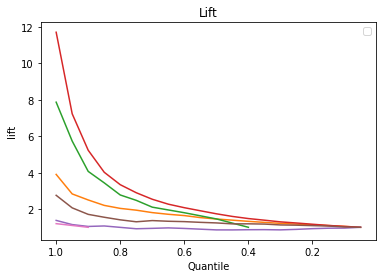

In [285]:
from matplotlib             import pyplot

for model in models:
    pyplot.plot(lifts[model]["Quantile"], lifts[model]["Lift"])
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("lift")
    pyplot.title("Lift")
    pyplot.legend(loc="upper right")

In [284]:
lifts["boostedTree"].head(20)

,Quantile,Lift,Base
19,1.00,11.715740,1.0
18,0.95,7.236192,1.0
17,0.90,5.232520,1.0
16,0.85,4.022989,1.0
15,0.80,3.340517,1.0
14,0.75,2.898413,1.0
13,0.70,2.539943,1.0
12,0.65,2.270115,1.0
11,0.60,2.076653,1.0
10,0.55,1.907772,1.0


## Test Set Creation

In [105]:
campaign_test = pd.read_csv(TestingFileCsv, sep=";")
print(len(campaign_test))

25645


In [106]:
# Use date limit. Use one year for now
gifts_before_testingcampaign = gifts.loc[(gifts['date'] < '2019-05-18') & (gifts['date'] > '2018-05-18')]
gifts_before_testingcampaign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7447 entries, 16 to 216593
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   donorID     7447 non-null   int64         
 1   campaignID  7447 non-null   Int64         
 2   amount      7447 non-null   float64       
 3   date        7447 non-null   datetime64[ns]
 4   Year        7447 non-null   int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 356.4 KB


In [107]:
gifts_before_testingcampaign.head()

,donorID,campaignID,amount,date,Year
16,100003,5326,4.0,2018-06-15,2018
17,100003,5359,3.0,2018-07-08,2018
18,100003,6168,4.0,2018-09-04,2018
19,100003,6922,4.0,2018-10-23,2018
20,100003,7037,4.0,2019-01-24,2019


In [108]:
gifts_num_donations_testing = gifts_before_testingcampaign.groupby('donorID', as_index=False)['campaignID'].count()
gifts_num_donations_testing_df = pd.DataFrame(gifts_num_donations_testing)
gifts_num_donations_testing_df.columns = ["donorID", "Num_Donations_Past_Year"]
gifts_num_donations_testing_df

,donorID,Num_Donations_Past_Year
0,100003,8
1,100005,2
2,100023,2
3,100027,1
4,100033,1
...,...,...
4353,265584,1
4354,281770,1
4355,317880,1
4356,480980,1


In [109]:
campaign_test = campaign_test.merge(gifts_num_donations_testing_df, on='donorID', how='left')
campaign_test

,donorID,Num_Donations_Past_Year
0,100001,NaN
1,100002,NaN
2,100008,NaN
3,100009,NaN
4,100010,NaN
...,...,...
25640,144682,NaN
25641,144683,NaN
25642,144686,NaN
25643,144690,NaN


In [110]:
gifts_total_amount_test = gifts_before_testingcampaign.groupby('donorID', as_index=False)['amount'].sum()
gifts_total_amount_test_df = pd.DataFrame(gifts_total_amount_test)
gifts_total_amount_test_df.columns = ["donorID", "Total_Amount_Donated_Past_Year"]
gifts_total_amount_test_df

,donorID,Total_Amount_Donated_Past_Year
0,100003,31.0
1,100005,15.0
2,100023,21.5
3,100027,6.0
4,100033,45.0
...,...,...
4353,265584,300.0
4354,281770,30.0
4355,317880,157.5
4356,480980,36.0


In [111]:
campaign_test = campaign_test.merge(gifts_total_amount_test_df, on='donorID', how='left')
campaign_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year
0,100001,NaN,NaN
1,100002,NaN,NaN
2,100008,NaN,NaN
3,100009,NaN,NaN
4,100010,NaN,NaN


In [112]:
gifts_before_testcampaign_all = gifts.loc[gifts['date'] < '2019-05-18']
gifts_last_donation_test = gifts_before_testcampaign_all.groupby('donorID', as_index=False)['date'].max()
gifts_last_donation_test_df = pd.DataFrame(gifts_last_donation_test)
gifts_last_donation_test_df.columns = ["donorID", "Date_of_last_donation_longterm"]
gifts_last_donation_test_df


,donorID,Date_of_last_donation_longterm
0,100001,2011-12-30
1,100002,2015-01-10
2,100003,2019-05-06
3,100004,2011-06-03
4,100005,2019-04-18
...,...,...
44695,265584,2018-09-23
44696,281770,2018-09-08
44697,317880,2018-09-12
44698,480980,2018-09-12


In [113]:
campaign_test = campaign_test.merge(gifts_last_donation_df, on='donorID', how='left')
campaign_test

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm
0,100001,NaN,NaN,2011-12-30
1,100002,NaN,NaN,2015-01-10
2,100008,NaN,NaN,2011-10-28
3,100009,NaN,NaN,2012-03-25
4,100010,NaN,NaN,2015-01-13
...,...,...,...,...
25640,144682,NaN,NaN,2016-08-10
25641,144683,NaN,NaN,2015-10-11
25642,144686,NaN,NaN,2015-04-28
25643,144690,NaN,NaN,2014-12-30


In [114]:
avg_donation_per_year = gifts_before_testcampaign_all.groupby(['donorID'], as_index=False)['amount'].mean()
avg_donation_per_year_df = pd.DataFrame(avg_donation_per_year)
avg_donation_per_year_df.columns = ["donorID","Average_donation_longterm"]
avg_donation_per_year_df

,donorID,Average_donation_longterm
0,100001,14.874167
1,100002,20.000000
2,100003,3.818182
3,100004,27.546923
4,100005,4.992000
...,...,...
44695,265584,300.000000
44696,281770,30.000000
44697,317880,157.500000
44698,480980,36.000000


In [115]:
campaign_test = campaign_test.merge(avg_donation_per_year_df, on='donorID', how='left')
campaign_test

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm
0,100001,NaN,NaN,2011-12-30,14.874167
1,100002,NaN,NaN,2015-01-10,20.000000
2,100008,NaN,NaN,2011-10-28,41.456667
3,100009,NaN,NaN,2012-03-25,17.198947
4,100010,NaN,NaN,2015-01-13,40.000000
...,...,...,...,...,...
25640,144682,NaN,NaN,2016-08-10,40.000000
25641,144683,NaN,NaN,2015-10-11,50.000000
25642,144686,NaN,NaN,2015-04-28,50.000000
25643,144690,NaN,NaN,2014-12-30,40.000000


In [116]:
test_set = campaign_test.merge(donors, on='donorID', how='left')
test_set

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth
0,100001,NaN,NaN,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,NaN,NaN,2015-01-10,20.000000,2260.0,Antwerp,Flanders,M,NL,1952-01-14
2,100008,NaN,NaN,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30
3,100009,NaN,NaN,2012-03-25,17.198947,1020.0,Brussels,Brussels,M,FR,1932-01-20
4,100010,NaN,NaN,2015-01-13,40.000000,1020.0,Brussels,Brussels,M,FR,1983-05-30
...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,NaN,NaN,2016-08-10,40.000000,1640.0,Flemish Brabant,Flanders,M,FR,1982-08-29
25641,144683,NaN,NaN,2015-10-11,50.000000,9308.0,East Flanders,Flanders,NaN,NL,1985-06-15
25642,144686,NaN,NaN,2015-04-28,50.000000,2440.0,Antwerp,Flanders,F,NL,1964-09-28
25643,144690,NaN,NaN,2014-12-30,40.000000,1950.0,Flemish Brabant,Flanders,M,FR,1976-05-07


In [117]:
test_set["dsc_donation"] = test_set.apply(is_dsc, axis=1)

In [118]:
# only people who donated through dsc
dsc_donors_test = test_set[test_set["region"].isna() == False]

In [119]:
dsc_donors_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   donorID                         25645 non-null  int64         
 1   Num_Donations_Past_Year         183 non-null    float64       
 2   Total_Amount_Donated_Past_Year  183 non-null    float64       
 3   Date_of_last_donation_longterm  25644 non-null  datetime64[ns]
 4   Average_donation_longterm       25644 non-null  float64       
 5   zipcode                         25644 non-null  float64       
 6   province                        25645 non-null  object        
 7   region                          25645 non-null  object        
 8   gender                          25634 non-null  object        
 9   language                        25645 non-null  object        
 10  dateOfBirth                     25645 non-null  object        
 11  ds

In [120]:
# Calculate age during campaign
dsc_donors_test["dateOfBirth"] = pd.to_datetime(dsc_donors_test["dateOfBirth"], format='%Y-%m-%d')
dsc_donors_test['age'] = (pd.to_datetime('2019-06-18', format='%Y-%m-%d') - dsc_donors_test["dateOfBirth"]) // timedelta(days=365.2425)

In [121]:
dsc_donors_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,NaN,NaN,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,51
1,100002,NaN,NaN,2015-01-10,20.000000,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,67
2,100008,NaN,NaN,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
3,100009,NaN,NaN,2012-03-25,17.198947,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,87
4,100010,NaN,NaN,2015-01-13,40.000000,1020.0,Brussels,Brussels,M,FR,1983-05-30,1,36


In [122]:
dsc_donors_test[['Num_Donations_Past_Year','Total_Amount_Donated_Past_Year']] = dsc_donors_test[['Num_Donations_Past_Year','Total_Amount_Donated_Past_Year']].fillna(0)

In [123]:
dsc_donors_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,0.0,0.0,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,F,NL,1967-12-24,1,51
1,100002,0.0,0.0,2015-01-10,20.000000,2260.0,Antwerp,Flanders,M,NL,1952-01-14,1,67
2,100008,0.0,0.0,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,M,FR,1937-08-30,1,81
3,100009,0.0,0.0,2012-03-25,17.198947,1020.0,Brussels,Brussels,M,FR,1932-01-20,1,87
4,100010,0.0,0.0,2015-01-13,40.000000,1020.0,Brussels,Brussels,M,FR,1983-05-30,1,36


In [124]:
dsc_donors_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25645 entries, 0 to 25644
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   donorID                         25645 non-null  int64         
 1   Num_Donations_Past_Year         25645 non-null  float64       
 2   Total_Amount_Donated_Past_Year  25645 non-null  float64       
 3   Date_of_last_donation_longterm  25644 non-null  datetime64[ns]
 4   Average_donation_longterm       25644 non-null  float64       
 5   zipcode                         25644 non-null  float64       
 6   province                        25645 non-null  object        
 7   region                          25645 non-null  object        
 8   gender                          25634 non-null  object        
 9   language                        25645 non-null  object        
 10  dateOfBirth                     25645 non-null  datetime64[ns]
 11  ds

In [125]:
print(dsc_donors_test['gender'].unique())
print(dsc_donors_test['language'].unique())

['F' 'M' nan]
['NL' 'FR' 'EN']


In [126]:
# Female:1
# Male: 2
dsc_donors_test.loc[dsc_donors_test['gender'] == 'F', 'gender'] = 1
dsc_donors_test.loc[dsc_donors_test['gender'] == 'M', 'gender'] = 2

dsc_donors_test.loc[dsc_donors_test['language'] == 'NL', 'language'] = 1
dsc_donors_test.loc[dsc_donors_test['language'] == 'FR', 'language'] = 2
dsc_donors_test.loc[dsc_donors_test['language'] == 'EN', 'language'] = 3

dsc_donors_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age
0,100001,0.0,0.0,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,51
1,100002,0.0,0.0,2015-01-10,20.000000,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,67
2,100008,0.0,0.0,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81
3,100009,0.0,0.0,2012-03-25,17.198947,1020.0,Brussels,Brussels,2,2,1932-01-20,1,87
4,100010,0.0,0.0,2015-01-13,40.000000,1020.0,Brussels,Brussels,2,2,1983-05-30,1,36


In [127]:
campaign_test_date = pd.to_datetime('2019-05-18')
campaign_test_date

Timestamp('2019-05-18 00:00:00')

In [128]:
# Get recency
dsc_donors_test['Recency'] = (campaign_test_date - dsc_donors_test['Date_of_last_donation_longterm']) // timedelta(days=1)

In [129]:
dsc_donors_test.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age,Recency
0,100001,0.0,0.0,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,51,2696.0
1,100002,0.0,0.0,2015-01-10,20.000000,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,67,1589.0
2,100008,0.0,0.0,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81,2759.0
3,100009,0.0,0.0,2012-03-25,17.198947,1020.0,Brussels,Brussels,2,2,1932-01-20,1,87,2610.0
4,100010,0.0,0.0,2015-01-13,40.000000,1020.0,Brussels,Brussels,2,2,1983-05-30,1,36,1586.0


In [130]:
dsc_donors_test_final = dsc_donors_test.merge(gifts_onTestCampaign, how="left", on="donorID")

In [131]:
dsc_donors_test_final['campaignID'] = dsc_donors_test_final['campaignID'].replace(7244, 1)


In [132]:
dsc_donors_test_final = dsc_donors_test_final.drop(columns=['amount', 'date', 'Year'])
dsc_donors_test_final['campaignID'] = dsc_donors_test_final['campaignID'].fillna(0)


In [133]:
dsc_donors_test_final['campaignID'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [134]:
dsc_donors_test_final = dsc_donors_test_final.rename(columns={'campaignID':'Target'})

dsc_donors_test_final

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Date_of_last_donation_longterm,Average_donation_longterm,zipcode,province,region,gender,language,dateOfBirth,dsc_donation,age,Recency,Target
0,100001,0.0,0.0,2011-12-30,14.874167,1861.0,Flemish Brabant,Flanders,1,1,1967-12-24,1,51,2696.0,0
1,100002,0.0,0.0,2015-01-10,20.000000,2260.0,Antwerp,Flanders,2,1,1952-01-14,1,67,1589.0,0
2,100008,0.0,0.0,2011-10-28,41.456667,1780.0,Flemish Brabant,Flanders,2,2,1937-08-30,1,81,2759.0,0
3,100009,0.0,0.0,2012-03-25,17.198947,1020.0,Brussels,Brussels,2,2,1932-01-20,1,87,2610.0,0
4,100010,0.0,0.0,2015-01-13,40.000000,1020.0,Brussels,Brussels,2,2,1983-05-30,1,36,1586.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,0.0,0.0,2016-08-10,40.000000,1640.0,Flemish Brabant,Flanders,2,2,1982-08-29,1,36,1011.0,0
25641,144683,0.0,0.0,2015-10-11,50.000000,9308.0,East Flanders,Flanders,NaN,1,1985-06-15,1,34,1315.0,0
25642,144686,0.0,0.0,2015-04-28,50.000000,2440.0,Antwerp,Flanders,1,1,1964-09-28,1,54,1481.0,0
25643,144690,0.0,0.0,2014-12-30,40.000000,1950.0,Flemish Brabant,Flanders,2,2,1976-05-07,1,43,1600.0,0


In [135]:
dsc_donors_test_final[dsc_donors_test_final['Target'] == 7244]['Target'] = 1
dsc_donors_test_final['Target'].value_counts()

0    25284
1      361
Name: Target, dtype: Int64

In [136]:
dsc_donors_test_final = dsc_donors_test_final.drop(columns=['Date_of_last_donation_longterm','dateOfBirth','dsc_donation'])
dsc_donors_test_final

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,province,region,gender,language,age,Recency,Target
0,100001,0.0,0.0,14.874167,1861.0,Flemish Brabant,Flanders,1,1,51,2696.0,0
1,100002,0.0,0.0,20.000000,2260.0,Antwerp,Flanders,2,1,67,1589.0,0
2,100008,0.0,0.0,41.456667,1780.0,Flemish Brabant,Flanders,2,2,81,2759.0,0
3,100009,0.0,0.0,17.198947,1020.0,Brussels,Brussels,2,2,87,2610.0,0
4,100010,0.0,0.0,40.000000,1020.0,Brussels,Brussels,2,2,36,1586.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,0.0,0.0,40.000000,1640.0,Flemish Brabant,Flanders,2,2,36,1011.0,0
25641,144683,0.0,0.0,50.000000,9308.0,East Flanders,Flanders,NaN,1,34,1315.0,0
25642,144686,0.0,0.0,50.000000,2440.0,Antwerp,Flanders,1,1,54,1481.0,0
25643,144690,0.0,0.0,40.000000,1950.0,Flemish Brabant,Flanders,2,2,43,1600.0,0


In [137]:
# add here gender preprocessing, language
# Female:1
# Male: 2
dsc_donors_test_final.loc[dsc_donors_test_final['gender'] == 'F', 'gender'] = 1
dsc_donors_test_final.loc[dsc_donors_test_final['gender'] == 'M', 'gender'] = 2

dsc_donors_test_final.loc[dsc_donors_test_final['language'] == 'NL', 'language'] = 1
dsc_donors_test_final.loc[dsc_donors_test_final['language'] == 'FR', 'language'] = 2
dsc_donors_test_final.loc[dsc_donors_test_final['language'] == 'EN', 'language'] = 3

dsc_donors_test_final.head()

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,province,region,gender,language,age,Recency,Target
0,100001,0.0,0.0,14.874167,1861.0,Flemish Brabant,Flanders,1,1,51,2696.0,0
1,100002,0.0,0.0,20.000000,2260.0,Antwerp,Flanders,2,1,67,1589.0,0
2,100008,0.0,0.0,41.456667,1780.0,Flemish Brabant,Flanders,2,2,81,2759.0,0
3,100009,0.0,0.0,17.198947,1020.0,Brussels,Brussels,2,2,87,2610.0,0
4,100010,0.0,0.0,40.000000,1020.0,Brussels,Brussels,2,2,36,1586.0,0


In [138]:
# one hot - province	region
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
transfomred = enc.fit_transform(dsc_donors_test_final[['province', 'region']])
df = pd.DataFrame(transfomred.toarray(), )
df.columns = enc.get_feature_names()
df

,x0_Antwerp,x0_Brussels,x0_East Flanders,x0_Flemish Brabant,x0_Hainaut,x0_Liege,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25641,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25642,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25643,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [139]:
dsc_donors_final_enc_test = dsc_donors_test_final.join(df)

In [140]:
dsc_donors_final_enc_test = dsc_donors_final_enc_test.drop(columns =['province', 'region'])
dsc_donors_final_enc_test

,donorID,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,Target,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,100001,0.0,0.0,14.874167,1861.0,1,1,51,2696.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100002,0.0,0.0,20.000000,2260.0,2,1,67,1589.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100008,0.0,0.0,41.456667,1780.0,2,2,81,2759.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,100009,0.0,0.0,17.198947,1020.0,2,2,87,2610.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,100010,0.0,0.0,40.000000,1020.0,2,2,36,1586.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,144682,0.0,0.0,40.000000,1640.0,2,2,36,1011.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25641,144683,0.0,0.0,50.000000,9308.0,NaN,1,34,1315.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25642,144686,0.0,0.0,50.000000,2440.0,1,1,54,1481.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25643,144690,0.0,0.0,40.000000,1950.0,2,2,43,1600.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [141]:
gender_mode_test = dsc_donors_final_enc_test['gender'].mode()[0]
dsc_donors_final_enc_test['gender'] = dsc_donors_final_enc_test['gender'].fillna(gender_mode_test)

In [142]:
zipcode_mode_test = dsc_donors_final_enc_test['zipcode'].mode()[0]
dsc_donors_final_enc_test['zipcode'] = dsc_donors_final_enc_test['zipcode'].fillna(zipcode_mode_test)

In [143]:
dsc_donors_final_enc_test['Average_donation_longterm'] = dsc_donors_final_enc_test['Average_donation_longterm'].fillna(0)
dsc_donors_final_enc_test['Recency'] = dsc_donors_final_enc_test['Recency'].fillna(0)

In [144]:
dsc_donors_final_enc_test.isna().sum()

donorID                           0
Num_Donations_Past_Year           0
Total_Amount_Donated_Past_Year    0
Average_donation_longterm         0
zipcode                           0
gender                            0
language                          0
age                               0
Recency                           0
Target                            0
x0_Antwerp                        0
x0_Brussels                       0
x0_East Flanders                  0
x0_Flemish Brabant                0
x0_Hainaut                        0
x0_Liege                          0
x0_Limburg                        0
x0_Luxembourg                     0
x0_Missing                        0
x0_Namur                          0
x0_Walloon Brabant                0
x0_West Flanders                  0
x1_Brussels                       0
x1_Flanders                       0
x1_Missing                        0
x1_Wallonia                       0
dtype: int64

In [145]:
dsc_donors_final_enc_test['Target'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [146]:
dsc_donors_final_enc_test['Target'].value_counts()

0    25284
1      361
Name: Target, dtype: Int64

In [147]:
dsc_donors_final_enc_test['Target'].nunique()

2

In [148]:
test_features = dsc_donors_final_enc_test.drop(columns=['Target', 'donorID'])
test_label = dsc_donors_final_enc_test['Target']


In [149]:
len(test_features)

25645

In [150]:
test_label.value_counts()

0    25284
1      361
Name: Target, dtype: Int64

In [151]:
# from sklearn.model_selection import train_test_split
# # X_train = train features
# # X_test = test/validation features
# # y_train = train labels
# # y_test = test/validation labels

# X_train, X_test, y_train, y_test = train_test_split(test_features, test_label, test_size=0.2, random_state=42)

In [152]:
# y_test = np.array(y_test).astype('int')
# y_train = np.array(y_train).astype('int')

In [153]:
# for model in models:
#     print(models[model])
#     models[model].fit(X_train,np.array(y_train))
#     print(f"{model} has been trained successfully")


# from sklearn.metrics        import accuracy_score
# from sklearn.metrics        import auc
# from sklearn.metrics        import roc_auc_score

In [154]:
# performances = {}

# for model in models:
#     predictions   = models[model].predict(X_test)
#     probabilities = pd.DataFrame(models[model].predict_proba(X_test))[1]

#     accuracy      = accuracy_score(y_test,predictions)
#     auc           = roc_auc_score(y_test,np.array(probabilities))
    
#     performances[model] = {"Accuracy":accuracy,"AUC":auc}

In [155]:
# pd.DataFrame(performances)

In [156]:
 len(np.array(test_label).astype(int))

25645

In [157]:
test_features

,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,x0_Brussels,...,x0_Limburg,x0_Luxembourg,x0_Missing,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia
0,0.0,0.0,14.874167,1861.0,1,1,51,2696.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,20.000000,2260.0,2,1,67,1589.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,41.456667,1780.0,2,2,81,2759.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,17.198947,1020.0,2,2,87,2610.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,40.000000,1020.0,2,2,36,1586.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,0.0,0.0,40.000000,1640.0,2,2,36,1011.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25641,0.0,0.0,50.000000,9308.0,2,1,34,1315.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25642,0.0,0.0,50.000000,2440.0,1,1,54,1481.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25643,0.0,0.0,40.000000,1950.0,2,2,43,1600.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [158]:
predictions   = boostedTree.predict(test_features)
probabilities = pd.DataFrame(boostedTree.predict_proba(test_features))

accuracy      = accuracy_score( np.array(test_label).astype(int),predictions)
auc           = roc_auc_score( np.array(test_label).astype(int),np.array(pd.DataFrame(boostedTree.predict_proba(test_features))[1]))

print("Accuracy",accuracy,"AUC",auc)

Accuracy 0.9850653148761942 AUC 0.7258706194582453


In [159]:
probabilities[0]

0        0.956018
1        0.988665
2        0.903525
3        0.963163
4        0.989341
           ...   
25640    0.984928
25641    0.991394
25642    0.973501
25643    0.983692
25644    0.984274
Name: 0, Length: 25645, dtype: float64

In [160]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
test_features = test_features.reset_index()
test_features['prediction'] = predictions
test_features['probabilities_0'] = probabilities[0]
test_features['probabilities_1'] = probabilities[1]

In [162]:
prediction_above80= test_features[(test_features['probabilities_0'] >= 0.8) | (test_features['probabilities_1'] >= 0.8 )]

In [163]:
test_features[test_features['prediction'] == 0]

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
0,0,0.0,0.0,14.874167,1861.0,1,1,51,2696.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.956018,0.043982
1,1,0.0,0.0,20.000000,2260.0,2,1,67,1589.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.988665,0.011335
2,2,0.0,0.0,41.456667,1780.0,2,2,81,2759.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.903525,0.096475
3,3,0.0,0.0,17.198947,1020.0,2,2,87,2610.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.963163,0.036837
4,4,0.0,0.0,40.000000,1020.0,2,2,36,1586.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.989341,0.010659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,25640,0.0,0.0,40.000000,1640.0,2,2,36,1011.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.984928,0.015072
25641,25641,0.0,0.0,50.000000,9308.0,2,1,34,1315.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.991394,0.008606
25642,25642,0.0,0.0,50.000000,2440.0,1,1,54,1481.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.973501,0.026499
25643,25643,0.0,0.0,40.000000,1950.0,2,2,43,1600.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.983692,0.016308


In [164]:
prediction_above80[prediction_above80['prediction'] == 1]

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
958,958,4.0,18.225,3.672157,3910.0,2,1,90,333.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.087048,0.912952
4465,4465,3.0,11.720,4.315455,3620.0,2,1,50,326.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.136975,0.863025
7208,7208,2.0,13.290,4.867540,9120.0,2,1,30,331.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.121928,0.878072
14338,14338,0.0,0.000,48.333333,9000.0,1,1,130,2461.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.088704,0.911296
15693,15693,4.0,16.400,5.861047,3220.0,2,1,64,326.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.115585,0.884415
21295,21295,2.0,6.645,4.444167,2880.0,2,1,69,324.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.174233,0.825767
25465,25465,4.0,13.200,4.277778,7140.0,2,2,61,326.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.113952,0.886048


In [165]:
dsc_donors_final_enc_test.nunique()

donorID                           25645
Num_Donations_Past_Year               8
Total_Amount_Donated_Past_Year       65
Average_donation_longterm          6461
zipcode                             939
gender                                2
language                              3
age                                  78
Recency                            3092
Target                                2
x0_Antwerp                            2
x0_Brussels                           2
x0_East Flanders                      2
x0_Flemish Brabant                    2
x0_Hainaut                            2
x0_Liege                              2
x0_Limburg                            2
x0_Luxembourg                         2
x0_Missing                            2
x0_Namur                              2
x0_Walloon Brabant                    2
x0_West Flanders                      2
x1_Brussels                           2
x1_Flanders                           2
x1_Missing                            2


In [166]:
test_features

,index,Num_Donations_Past_Year,Total_Amount_Donated_Past_Year,Average_donation_longterm,zipcode,gender,language,age,Recency,x0_Antwerp,...,x0_Namur,x0_Walloon Brabant,x0_West Flanders,x1_Brussels,x1_Flanders,x1_Missing,x1_Wallonia,prediction,probabilities_0,probabilities_1
0,0,0.0,0.0,14.874167,1861.0,1,1,51,2696.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.956018,0.043982
1,1,0.0,0.0,20.000000,2260.0,2,1,67,1589.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.988665,0.011335
2,2,0.0,0.0,41.456667,1780.0,2,2,81,2759.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.903525,0.096475
3,3,0.0,0.0,17.198947,1020.0,2,2,87,2610.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.963163,0.036837
4,4,0.0,0.0,40.000000,1020.0,2,2,36,1586.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0.989341,0.010659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,25640,0.0,0.0,40.000000,1640.0,2,2,36,1011.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.984928,0.015072
25641,25641,0.0,0.0,50.000000,9308.0,2,1,34,1315.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.991394,0.008606
25642,25642,0.0,0.0,50.000000,2440.0,1,1,54,1481.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.973501,0.026499
25643,25643,0.0,0.0,40.000000,1950.0,2,2,43,1600.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.983692,0.016308


In [167]:
test_features['prediction'].unique()

array([0, 1])